## Part1-1)

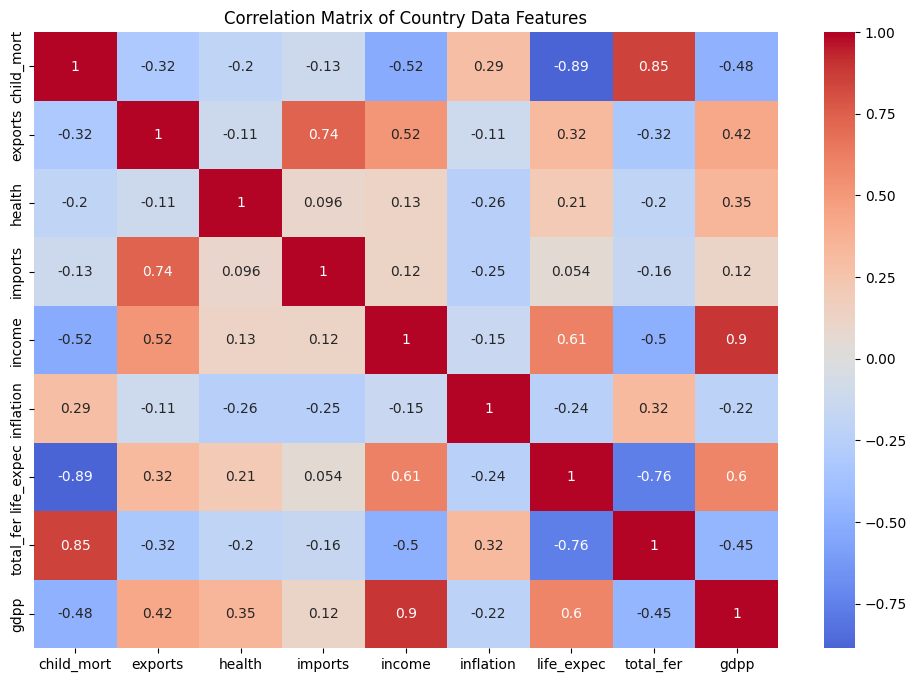

               country  child_mort  exports  income  life_expec  total_fer  \
0          Afghanistan        90.2     10.0    1610        56.2       5.82   
1              Albania        16.6     28.0    9930        76.3       1.65   
2              Algeria        27.3     38.4   12900        76.5       2.89   
3               Angola       119.0     62.3    5900        60.1       6.16   
4  Antigua and Barbuda        10.3     45.5   19100        76.8       2.13   

    gdpp  
0    553  
1   4090  
2   4460  
3   3530  
4  12200  


In [7]:
import pandas as pd

file_path = './Datasets/Country-data.csv'
data = pd.read_csv(file_path)

correlation_matrix = data.drop(columns=['country']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Country Data Features')
plt.show()

reduced_data = data.drop(columns=['health', 'inflation', 'imports'])

print(reduced_data.head())

reduced_file_path = './Datasets/data/Reduced_Country_Data.csv'
reduced_data.to_csv(reduced_file_path, index=False)

## Part1-2)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['exports', 'life_expec', 'gdpp','child_mort', 'total_fer', 'income']
reduced_data[numerical_features] = scaler.fit_transform(reduced_data[numerical_features])

print("Normalized DataFrame:")
print(reduced_data.head())

normalized_file_path = './Datasets/data/Normalized_Country_Data.csv'
reduced_data.to_csv(normalized_file_path, index=False)

Normalized DataFrame:
               country  child_mort   exports    income  life_expec  total_fer  \
0          Afghanistan    1.291532 -1.138280 -0.808245   -1.619092   1.902882   
1              Albania   -0.538949 -0.479658 -0.375369    0.647866  -0.859973   
2              Algeria   -0.272833 -0.099122 -0.220844    0.670423  -0.038404   
3               Angola    2.007808  0.775381 -0.585043   -1.179234   2.128151   
4  Antigua and Barbuda   -0.695634  0.160668  0.101732    0.704258  -0.541946   

       gdpp  
0 -0.679180  
1 -0.485623  
2 -0.465376  
3 -0.516268  
4 -0.041817  


## Part1-3)

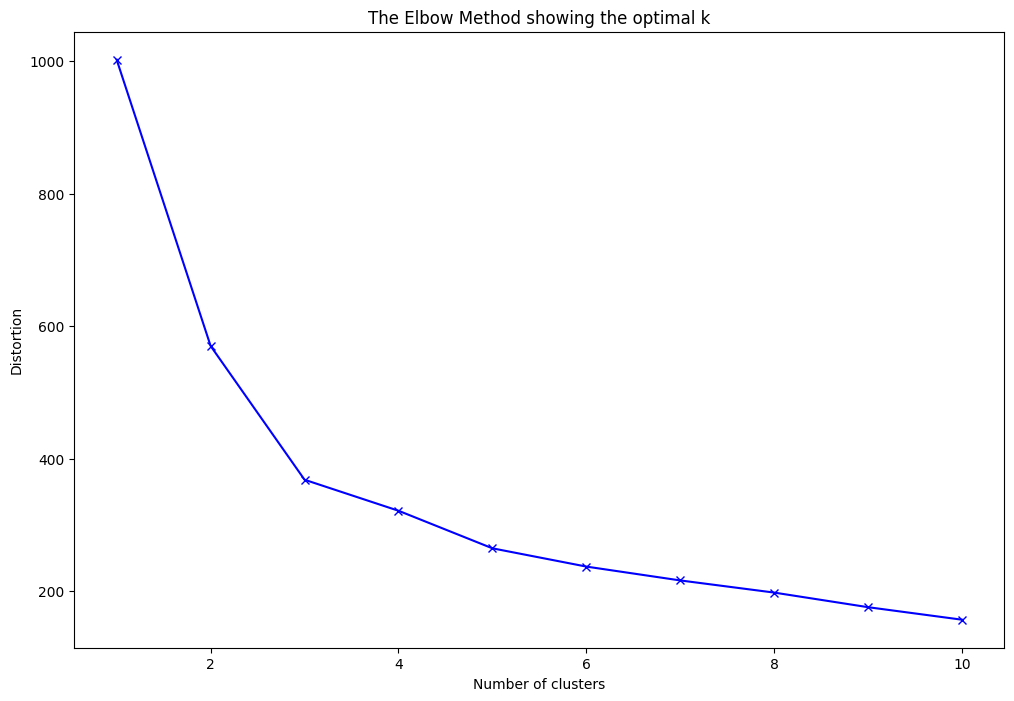

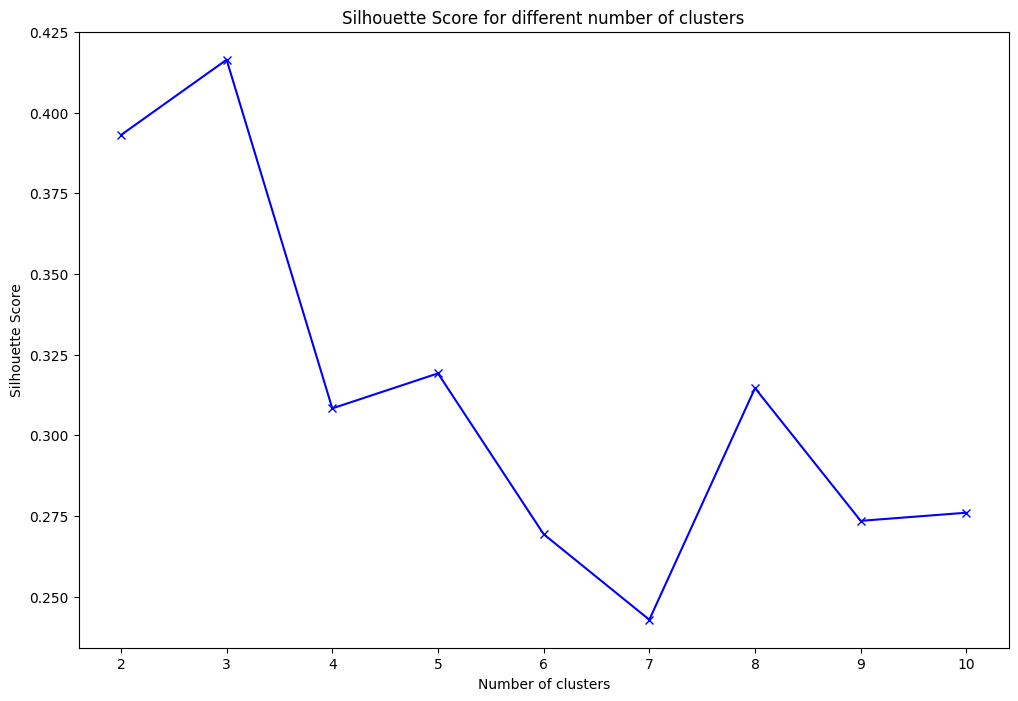

Optimal number of clusters based on silhouette score: 3


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def plot_elbow(data, max_k=10):
    distortions = []
    K = range(1, max_k+1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(12, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

plot_elbow(reduced_data[numerical_features])

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data[numerical_features])
    score = silhouette_score(reduced_data[numerical_features], kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()

optimal_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")

## Part 1-5)

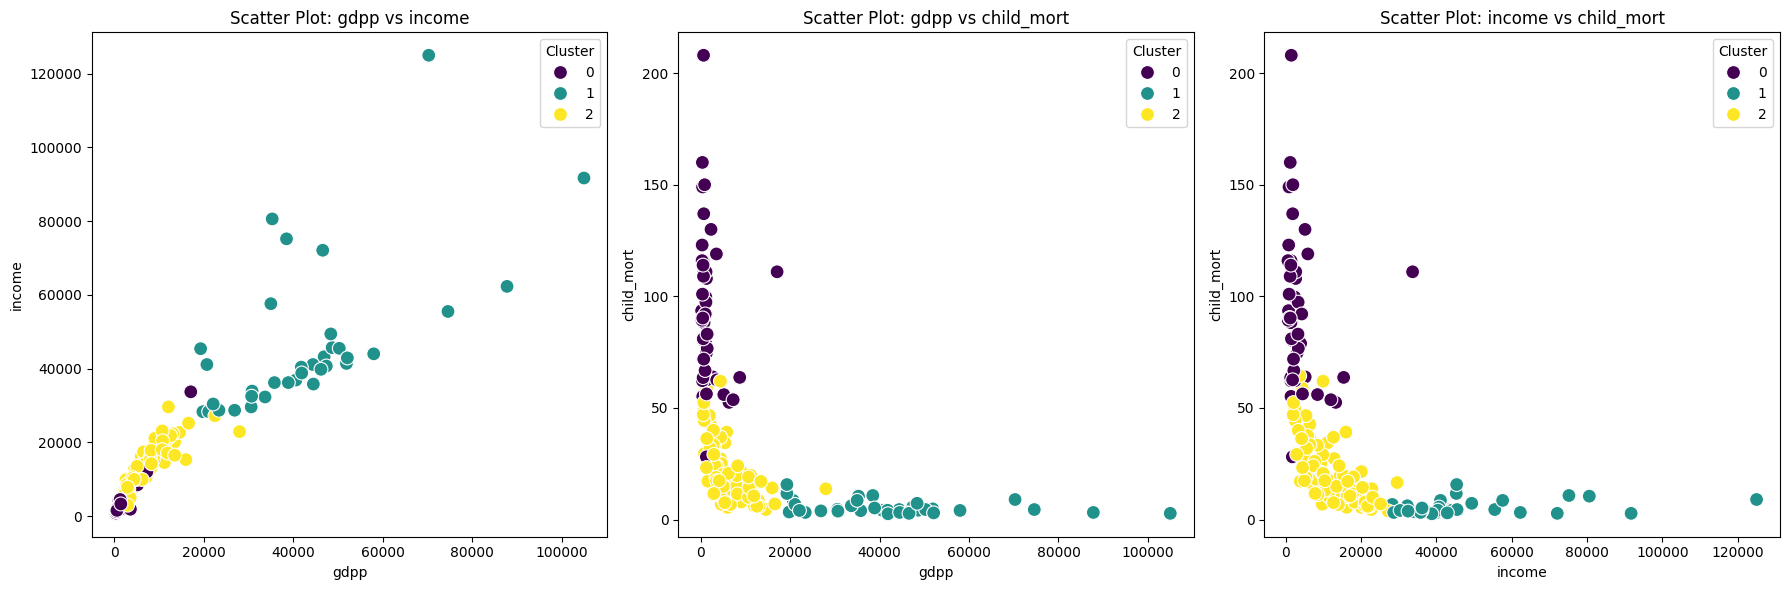

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(reduced_data[numerical_features])
    score = silhouette_score(reduced_data[numerical_features], kmeans.labels_)
    silhouette_scores.append(score)

optimal_clusters = np.argmax(silhouette_scores) + 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=13)
kmeans.fit(reduced_data[numerical_features])

data['Cluster'] = kmeans.labels_

features = ['gdpp', 'income', 'child_mort']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x=features[0], y=features[1], hue='Cluster', palette='viridis', s=100)
plt.title(f'Scatter Plot: {features[0]} vs {features[1]}')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x=features[0], y=features[2], hue='Cluster', palette='viridis', s=100)
plt.title(f'Scatter Plot: {features[0]} vs {features[2]}')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x=features[1], y=features[2], hue='Cluster', palette='viridis', s=100)
plt.title(f'Scatter Plot: {features[1]} vs {features[2]}')

plt.tight_layout()
plt.show()

## Part2-1)

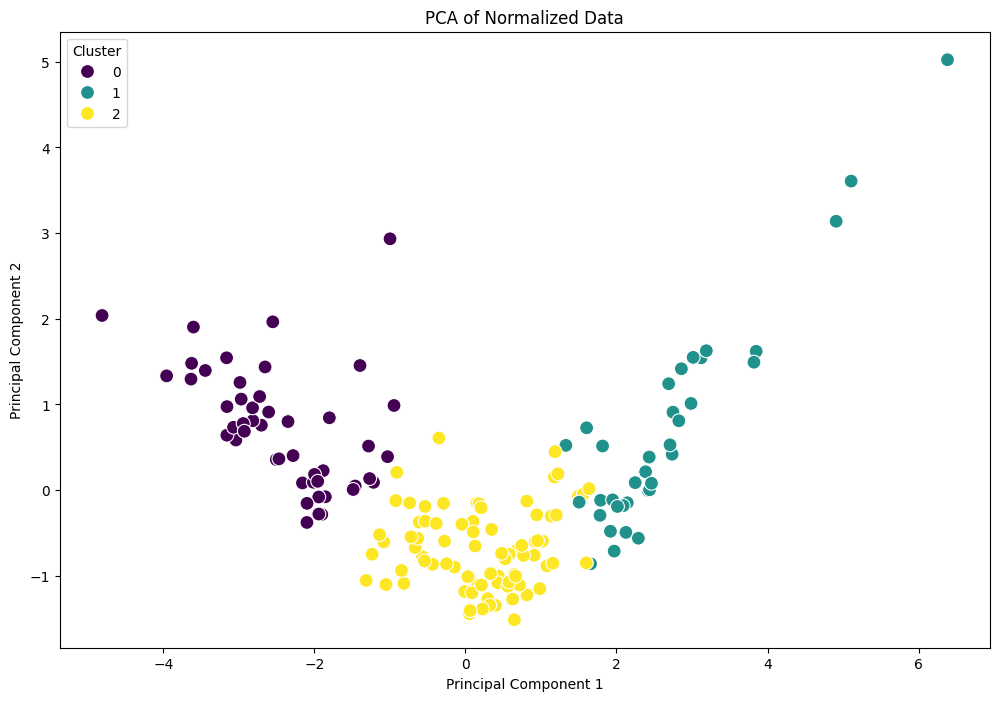

Explained variance ratio: [0.64662853 0.17660371]


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data[numerical_features])
    score = silhouette_score(reduced_data[numerical_features], kmeans.labels_)
    silhouette_scores.append(score)

optimal_clusters = np.argmax(silhouette_scores) + 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=13)
kmeans.fit(reduced_data[numerical_features])

data['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
pca_result = pca.fit_transform(reduced_data[numerical_features])

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA of Normalized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

## Part 2-2)

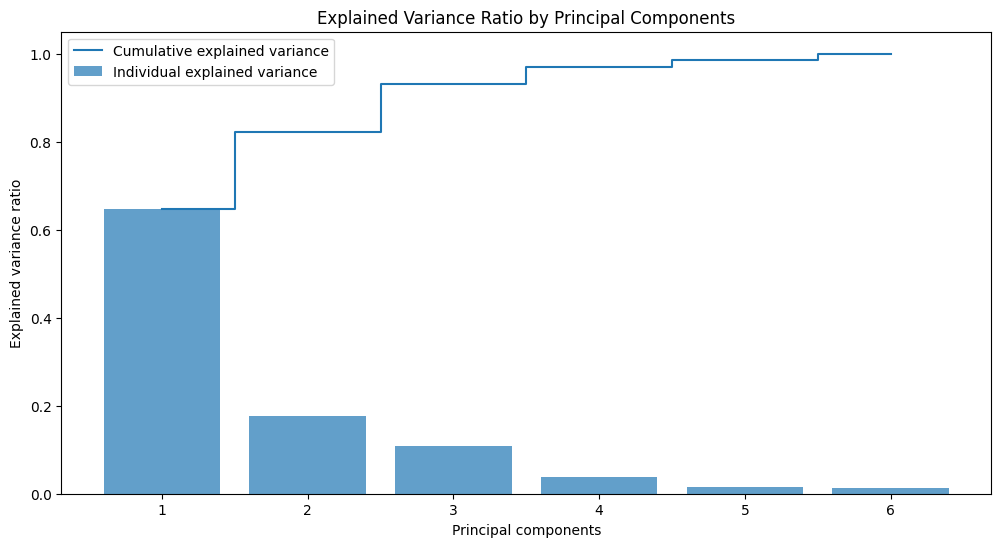

Number of components that explain at least 95% of the variance: 4


In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np




pca = PCA()
pca.fit(reduced_data[numerical_features])


explained_variance_ratio = pca.explained_variance_ratio_


cumulative_explained_variance = np.cumsum(explained_variance_ratio)


plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.show()


num_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components that explain at least 95% of the variance: {num_components_95_variance}')

## Part 2-3)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np




silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data[numerical_features])
    score = silhouette_score(reduced_data[numerical_features], kmeans.labels_)
    silhouette_scores.append(score)


optimal_clusters = np.argmax(silhouette_scores) + 2


kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(reduced_data[numerical_features])


data['Cluster'] = kmeans.labels_


pca = PCA()
pca.fit(reduced_data[numerical_features])


explained_variance_ratio = pca.explained_variance_ratio_


cumulative_explained_variance = np.cumsum(explained_variance_ratio)



num_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components that explain at least 95% of the variance: {num_components_95_variance}')


pca = PCA(n_components=num_components_95_variance)
reduced_scaled_data = pca.fit_transform(reduced_data[numerical_features])


reduced_df = pd.DataFrame(data=reduced_scaled_data, columns=[f'PC{i+1}' for i in range(num_components_95_variance)])
reduced_df['Cluster'] = data['Cluster']


print(reduced_df.head())


reduced_file_path = './Datasets/data/Reduced_Country_Data_PCA.csv'
reduced_df.to_csv(reduced_file_path, index=False)

Number of components that explain at least 95% of the variance: 4
        PC1       PC2       PC3       PC4  Cluster
0 -3.038175  0.584414 -0.722295 -0.201312        0
1  0.397803 -1.345418  0.116536  0.099670        1
2  0.127722 -0.652163  0.194484 -0.484844        1
3 -2.550040  1.963879  0.526670 -0.635068        0
4  0.922887 -0.603390  0.242249 -0.174126        1


## Part 2-4)

        PC1       PC2       PC3       PC4  Cluster  Cluster_Reduced
0 -3.038175  0.584414 -0.722295 -0.201312        0                0
1  0.397803 -1.345418  0.116536  0.099670        1                2
2  0.127722 -0.652163  0.194484 -0.484844        1                2
3 -2.550040  1.963879  0.526670 -0.635068        0                0
4  0.922887 -0.603390  0.242249 -0.174126        1                2
Silhouette score with original data: 0.41637868747009393
Silhouette score with reduced data: 0.4334010786876523


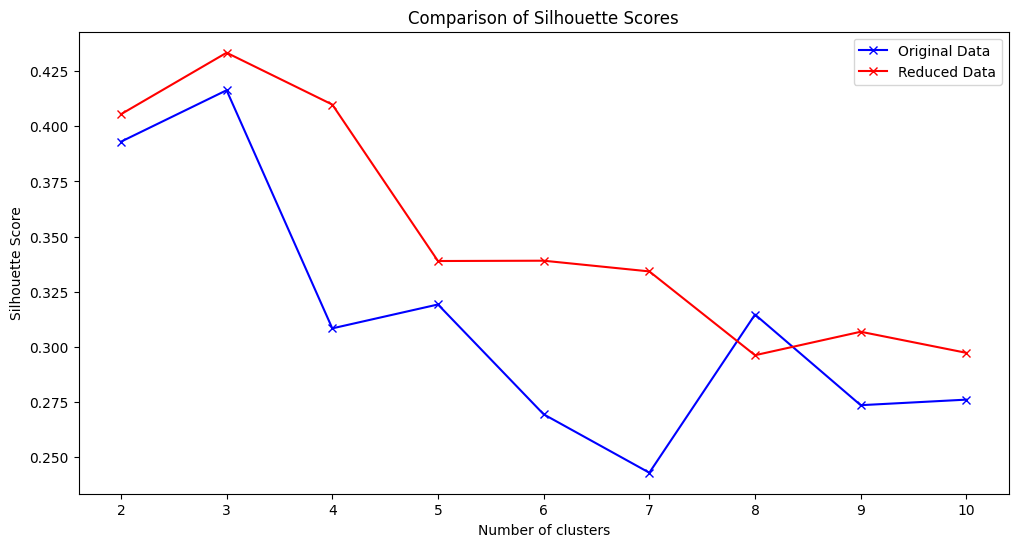

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



silhouette_scores_reduced = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(reduced_scaled_data)
    score = silhouette_score(reduced_scaled_data, kmeans.labels_)
    silhouette_scores_reduced.append(score)


optimal_clusters_reduced = np.argmax(silhouette_scores_reduced) + 2


kmeans_reduced = KMeans(n_clusters=optimal_clusters_reduced, random_state=42)
kmeans_reduced.fit(reduced_scaled_data)


reduced_df['Cluster_Reduced'] = kmeans_reduced.labels_


print(reduced_df.head())


reduced_file_path_with_clusters = './Datasets/data/Reduced_Country_Data_PCA_with_Clusters.csv'
reduced_df.to_csv(reduced_file_path_with_clusters, index=False)


print(f'Silhouette score with original data: {max(silhouette_scores)}')
print(f'Silhouette score with reduced data: {max(silhouette_scores_reduced)}')


plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-', label='Original Data')
plt.plot(range(2, 11), silhouette_scores_reduced, 'rx-', label='Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.legend(loc='best')
plt.show()

In [6]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, davies_bouldin_score, v_measure_score
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# Generate a dataset with a solid circle inside another ring
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Calculate metrics for KMeans
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_ami = adjusted_mutual_info_score(y, kmeans_labels)
kmeans_dbi = davies_bouldin_score(X, kmeans_labels)
kmeans_vmeasure = v_measure_score(y, kmeans_labels)

# Calculate metrics for DBSCAN
dbscan_ari = adjusted_rand_score(y, dbscan_labels)
dbscan_ami = adjusted_mutual_info_score(y, dbscan_labels)
dbscan_dbi = davies_bouldin_score(X, dbscan_labels)
dbscan_vmeasure = v_measure_score(y, dbscan_labels)

print(f"KMeans ARI: {kmeans_ari:.2f}, AMI: {kmeans_ami:.2f}, DBI: {kmeans_dbi:.2f}, V-Measure: {kmeans_vmeasure:.2f}")
print(f"DBSCAN ARI: {dbscan_ari:.2f}, AMI: {dbscan_ami:.2f}, DBI: {dbscan_dbi:.2f}, V-Measure: {dbscan_vmeasure:.2f}")


KMeans ARI: -0.00, AMI: -0.00, DBI: 1.31, V-Measure: 0.00
DBSCAN ARI: 1.00, AMI: 1.00, DBI: 775.96, V-Measure: 1.00


In [4]:
X

,x,y
0,2.305610,-9.61493
1,-0.770364,-7.51462
2,1.462830,5.79998
3,0.338422,7.86512
4,9.105560,-2.87990
...,...,...
4595,0.352947,3.69114
4596,-0.027608,-4.36149
4597,-1.702690,3.72361
4598,1.192790,-0.20883


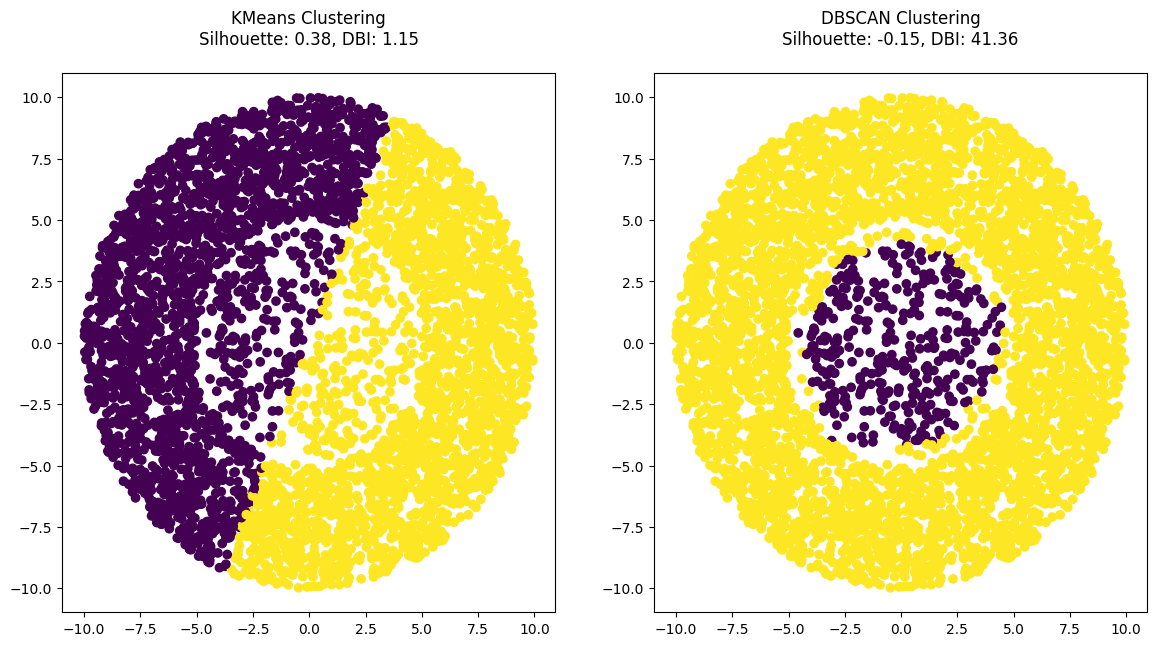